## Attribute Information:

#### Listing of attributes:

>50K, <=50K.

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
sns.set()
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('adult.csv')

### Finding Imbalance
Let's look at if we have any imbalance!

In [4]:
df.income.value_counts(normalize = True)

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

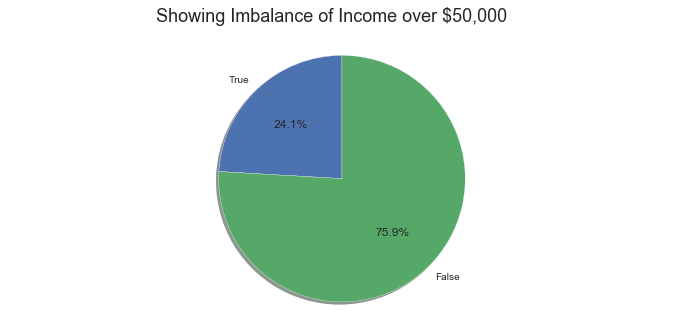

In [5]:
fig, ax = plt.subplots( figsize = (12,5))
plt.suptitle('Showing Imbalance of Income over $50,000', fontsize = 18)
plt.pie([df[df['income']=='>50K'].income.count(), df[df['income']=='<=50K'].income.count()], labels = ['True', 'False'],shadow=True, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

### Fixing Null Values
Looking for null values, it looks like the dataset doesn't have any. Upon further inspection, looks like the 'null' values have '?' instead so we have to convert! We should also take out the '.' in the column names so that it's cleaner to work with.

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [7]:
df.columns = df.columns.map(lambda x: x.replace('.', '_'))

In [8]:
for x in df.columns:
    df[x] = np.where(df[x] =='?', None, df[x])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [9]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [9]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [10]:
df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [11]:
df['over_50k'] = np.where(df['income']=='>50K', 1, 0)

In [12]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,over_50k
0,90,None,77053,HS-grad,9,Widowed,None,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
2,66,None,186061,Some-college,10,Widowed,None,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0


In [13]:
df.race.nunique()

5

In [14]:
df.groupby(['native_country']).over_50k.value_counts(normalize= True)

native_country  over_50k
Cambodia        0           0.631579
                1           0.368421
Canada          0           0.677686
                1           0.322314
China           0           0.733333
                              ...   
United-States   1           0.245835
Vietnam         0           0.925373
                1           0.074627
Yugoslavia      0           0.625000
                1           0.375000
Name: over_50k, Length: 80, dtype: float64

In [15]:
df.groupby(['race']).over_50k.value_counts(normalize = True)

race                over_50k
Amer-Indian-Eskimo  0           0.884244
                    1           0.115756
Asian-Pac-Islander  0           0.734360
                    1           0.265640
Black               0           0.876120
                    1           0.123880
Other               0           0.907749
                    1           0.092251
White               0           0.744140
                    1           0.255860
Name: over_50k, dtype: float64

In [18]:
df.groupby(['occupation']).over_50k.value_counts(normalize=True)

occupation         over_50k
Adm-clerical       0           0.865517
                   1           0.134483
Armed-Forces       0           0.888889
                   1           0.111111
Craft-repair       0           0.773359
                   1           0.226641
Exec-managerial    0           0.515986
                   1           0.484014
Farming-fishing    0           0.884306
                   1           0.115694
Handlers-cleaners  0           0.937226
                   1           0.062774
Machine-op-inspct  0           0.875125
                   1           0.124875
Other-service      0           0.958422
                   1           0.041578
Priv-house-serv    0           0.993289
                   1           0.006711
Prof-specialty     0           0.550966
                   1           0.449034
Protective-serv    0           0.674884
                   1           0.325116
Sales              0           0.730685
                   1           0.269315
Tech-support

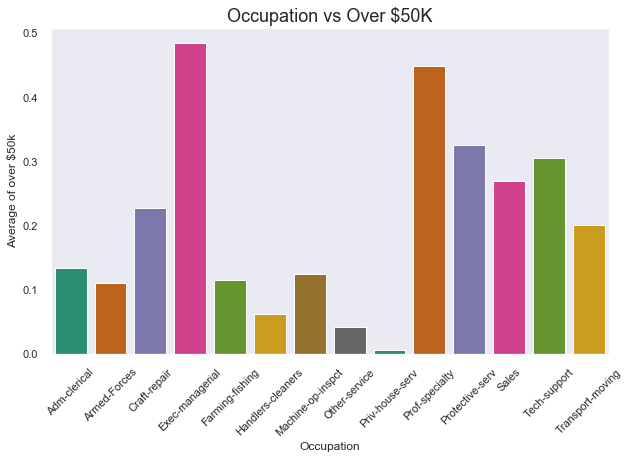

In [43]:
plt.figure(figsize = (10,6))
y = df.groupby(['occupation']).over_50k.mean();
x = y.index
sns.barplot(x,y, palette='Dark2')
sns.set(style='dark')
plt.title('Occupation vs Over $50K', fontsize=18);
plt.xlabel('Occupation');
plt.xticks(rotation=45)
plt.ylabel('Average of over $50k');
# plt.suptitle(, fontsize=12);

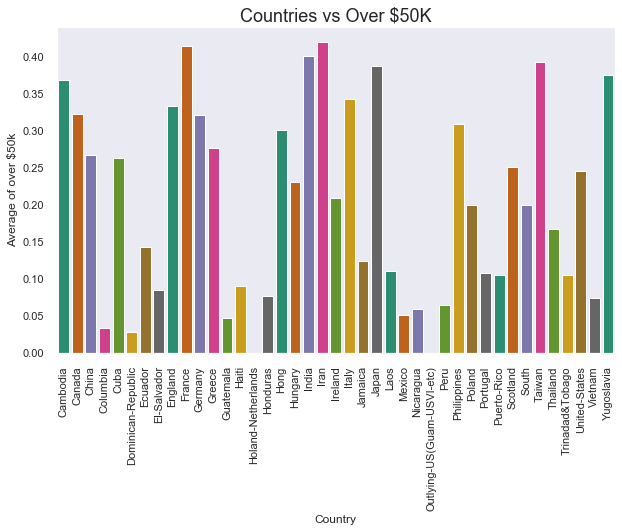

In [46]:
plt.figure(figsize = (10,6))
y = df.groupby(['native_country']).over_50k.mean();
x = y.index
sns.barplot(x,y, palette='Dark2')
sns.set(style='dark')
plt.title('Countries vs Over $50K', fontsize=18);
plt.xlabel('Country');
plt.xticks(rotation=90)
plt.ylabel('Average of over $50k');
# plt.suptitle(, fontsize=12);

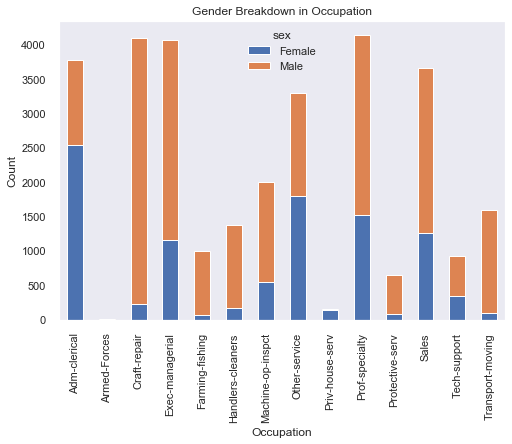

In [67]:
df.groupby(['occupation','sex']).sex.count().unstack().plot.bar(stacked=True);
plt.title('Gender Breakdown in Occupation');
plt.xlabel('Occupation');
plt.ylabel('Count');

In [10]:
df.occupation.count()

30718

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  object
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  object
 3   education       32561 non-null  object
 4   education_num   32561 non-null  object
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  object
 11  capital_loss    32561 non-null  object
 12  hours_per_week  32561 non-null  object
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: object(15)
memory usage: 3.7+ MB
